In [56]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

PATH = '/Users/carlosalvarado/Desktop/ComputerVision/fotos/'

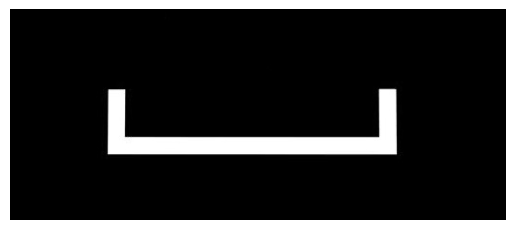

In [57]:
im = cv.imread(PATH+'arrow.jpg', cv.IMREAD_GRAYSCALE)
#im = cv.imread(PATH+'cameraman_face.jpg', cv.IMREAD_GRAYSCALE)

#im = cv.imread(PATH+'leaf.png', cv.IMREAD_GRAYSCALE)
#im = cv.threshold(cv.imread(PATH+'arrow.jpg', cv.IMREAD_GRAYSCALE),100,255,cv.THRESH_BINARY)[1]

fig,ax1 = plt.subplots()
ax1.imshow(im, vmin=0, vmax=255, cmap='gray')
plt.axis('off')
plt.show()

In [58]:
sobelx = cv.Sobel(im, cv.CV_64F, 1,0, ksize=5)
sobely = cv.Sobel(im, cv.CV_64F, 0,1, ksize=5)

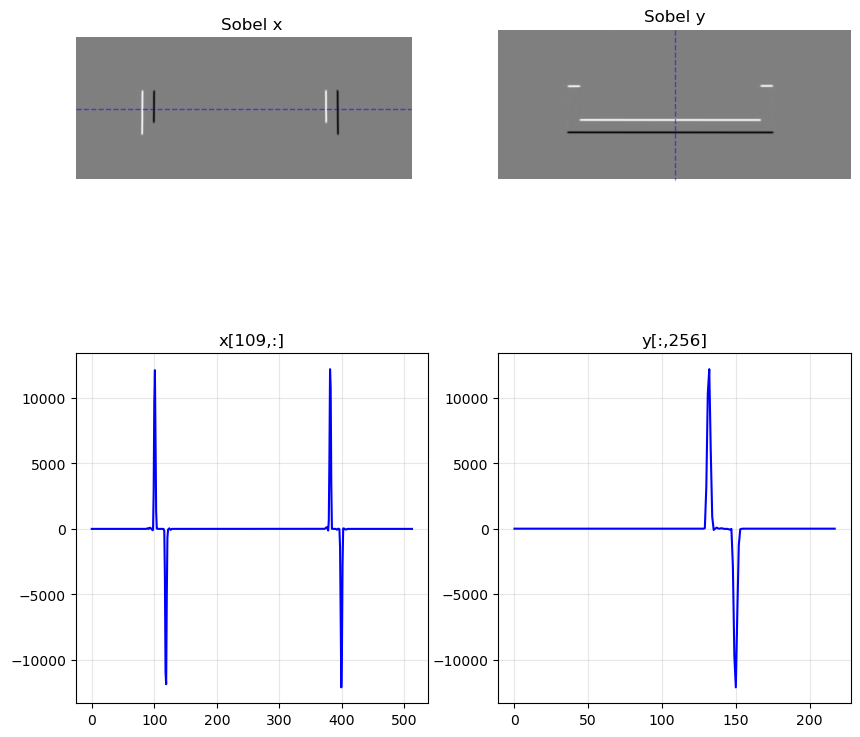

In [59]:
def cmp_edges(x, y=0, single=False, cut=None, same_axis=False, titles=None):
    """Plot the gradient images x and y images with a corresponding
    sample of a row for x and column for y gradient.
    
    Args:
        x,y (np.array): Gradient images in the x and y directions
        
    Returns:
        None
    """
    if single:
        if cut ==None:
            cut = [x.shape[0]//2]
            
        fig,axes = plt.subplots(2,1,figsize=(10,10))

        axes[0].imshow(x, cmap = 'gray')
        axes[0].hlines(cut[0], 0,x.shape[1], color='b',linestyles ='dashed',lw=1,alpha=0.5)
        axes[0].axis('off')
        if titles != None:
            axes[0].set_title(titles[0])

        axes[1].plot(x[cut[0],:], c='b')
        axes[1].grid(alpha=0.3)
        axes[1].set_title('x[{0},:]'.format(cut[0]))

    else:
        if cut ==None:
            if not same_axis:
                cut = [x.shape[0]//2 , y.shape[1]//2]
            else:
                cut = [x.shape[0]//2 , y.shape[0]//2]

        fig,axes = plt.subplots(2,2,figsize=(10,10))

        axes[0,0].imshow(x, cmap = 'gray')
        axes[0,0].hlines(cut[0],0,x.shape[1], color='b',linestyles ='dashed',lw=1,alpha=0.5)
        axes[0,0].axis('off')
        
        if titles != None:
            axes[0,0].set_title(titles[0])

        axes[0,1].imshow(y, cmap = 'gray')
        if not same_axis:
            axes[0,1].vlines(cut[1],0,x.shape[0], color='b',linestyles ='dashed',lw=1,alpha=0.5)
        else:
            axes[0,1].hlines(cut[1],0,x.shape[1], color='b',linestyles ='dashed',lw=1,alpha=0.5)
        axes[0,1].axis('off')
        if titles != None:
            axes[0,1].set_title(titles[1])

        axes[1,0].plot(x[cut[0],:], c='b')
        axes[1,0].grid(alpha=0.3)
        axes[1,0].set_title('x[{0},:]'.format(cut[0]))

        axes[1,1].plot(y[:,cut[1]], c='b')
        axes[1,1].grid(alpha=0.3)
        axes[1,1].set_title('y[:,{0}]'.format(cut[1]))
    
cmp_edges(sobelx,sobely,same_axis=False, titles=['Sobel x','Sobel y'])

In [60]:
def imgdesc(img):
    print("dtype is ",img.dtype)
    print("max value is ", img.max())
    print("min value is ", img.min())

imgdesc(sobelx)

dtype is  float64
max value is  12211.0
min value is  -12191.0


In [61]:
def float64_to_uint8(img, centered=False):
    if not centered:
        img = abs(img)

    temp = 255*(img - img.min())/(img.max() - img.min())
    
    return temp.astype(np.uint8)

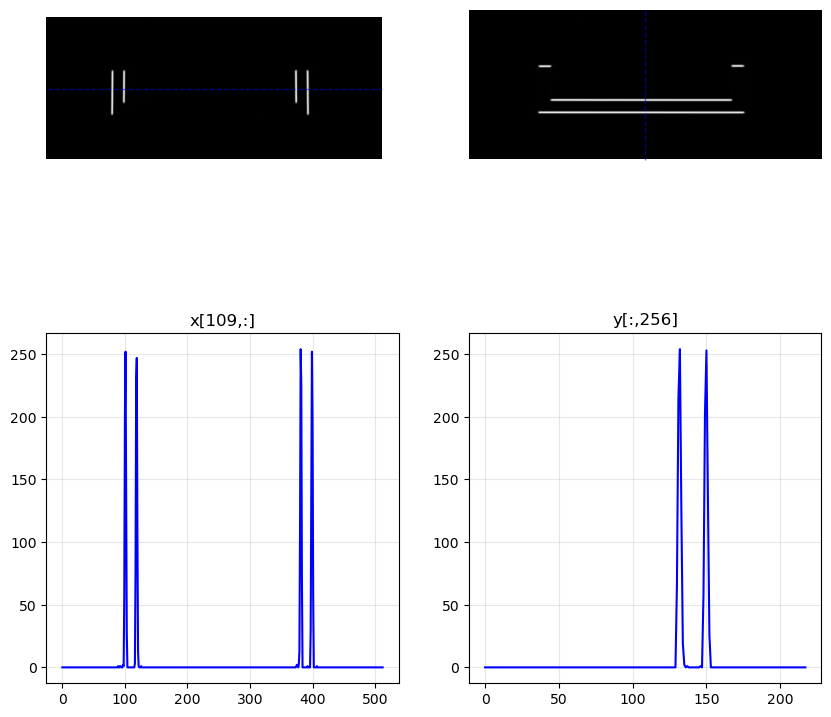

In [62]:
sx = float64_to_uint8(sobelx)
sy = float64_to_uint8(sobely)
cmp_edges(sx, sy)

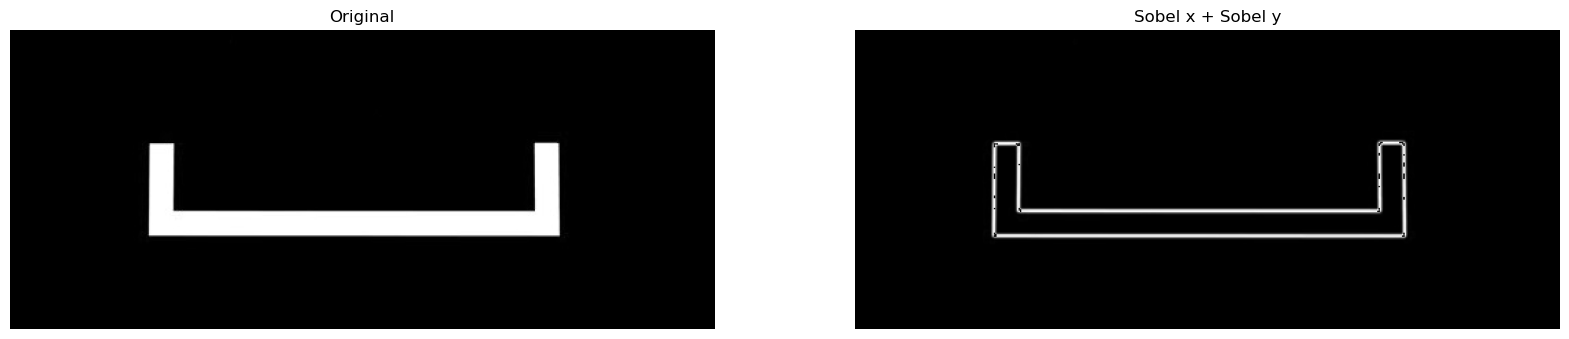

In [63]:
fig,axes = plt.subplots(1,2,figsize=(20,20))
axes[0].imshow(im, cmap = 'gray')
axes[0].axis('off')
axes[0].set_title('Original')
axes[1].imshow(sx+sy, cmap = 'gray')
axes[1].axis('off')
axes[1].set_title('Sobel x + Sobel y')
plt.show()

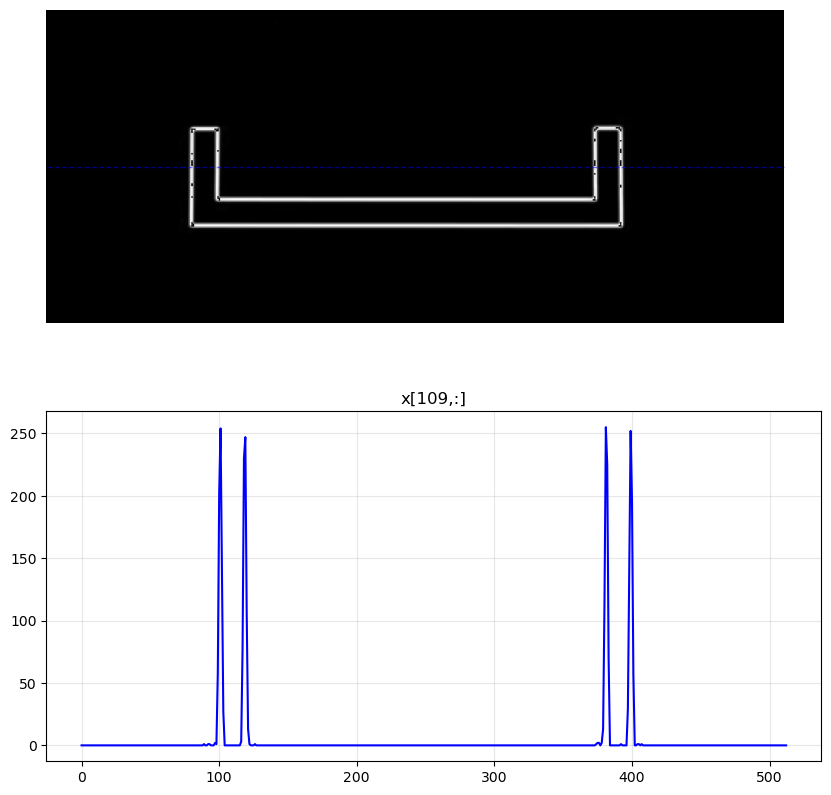

In [64]:
cmp_edges(sx+sy,single=True)

Text(0.5, 1.0, 'Abs(uint8)')

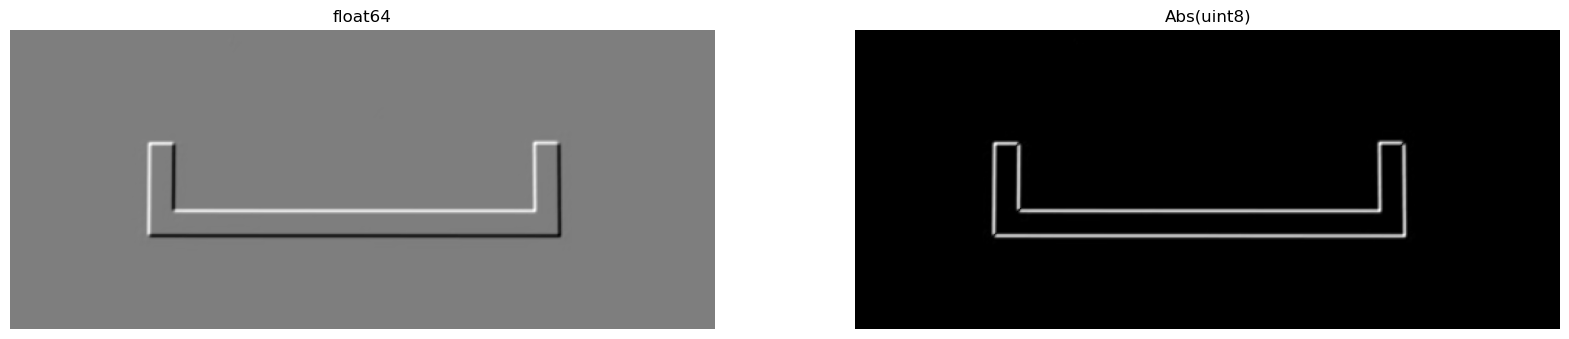

In [65]:
s = sobelx+sobely
fig,axes = plt.subplots(1,2,figsize=(20,20))
axes[0].imshow( sobelx+sobely, cmap = 'gray')
axes[0].axis('off')
axes[0].set_title('float64')
axes[1].imshow(float64_to_uint8(s), cmap = 'gray')
axes[1].axis('off')
axes[1].set_title('Abs(uint8)')

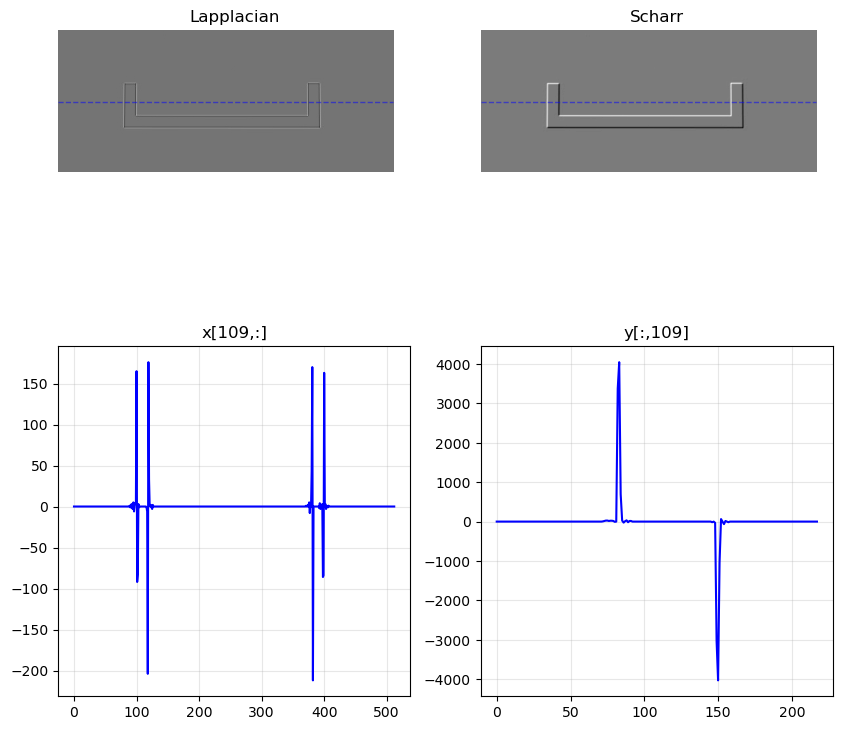

In [66]:
laplacian = cv.Laplacian(im, cv.CV_64F)
scharrx = cv.Scharr(im.astype(np.float64), -1, 1, 0,cv.BORDER_CONSTANT)
scharry = cv.Scharr(im.astype(np.float64), -1, 0, 1,cv.BORDER_CONSTANT)
scharr = scharrx + scharry
cmp_edges(laplacian,scharr,same_axis=True, titles=['Lapplacian','Scharr'])

funcion para dada las dos ecuaciones, crear la magnitud del gradiente y el ángulo del mismo

In [67]:
from numpy import sqrt

In [68]:
def sobel_mag(sx, sy):
    magnitude = np.sqrt(sx**2 + sy**2)
    return magnitude #imagen, esta en float. usar float64_to_unint

def sober_angle(sx, sy):
    angle = np.arctan2(sy, sx)
    return angle #imagen esta en float.



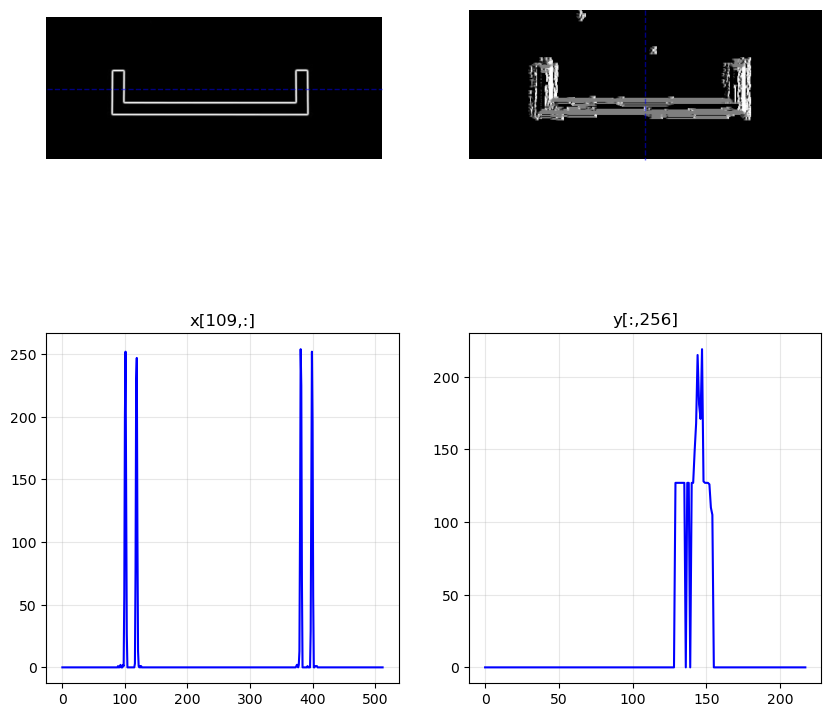

In [69]:
mag = sobel_mag(sobelx, sobely)
mag_int = float64_to_uint8(mag)
ang = sober_angle(sobelx, sobely)
ang_int = float64_to_uint8(ang)


cmp_edges(mag_int, ang_int)